Do your work in this file.  Please submit as a notebook with the cells run (ie your table output and plot output visible).  If the output isn't visible to you when submitting, then we can't see the output to grade on github.  I'm happy to double check submissions if you're getting things in with some time to spare.

In [1]:
import json

import pandas as pd
import sqlalchemy

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Prompt 1 - Create a `credentials.json` file

Format of credentials.json file

```json
{
  "host": "mariadb-compx0.oit.utk.edu",
  "port": 3306,
  "username": "yourusername",
  "password": "***********"
}
```

-------

#### Prompt 2 - Add `credentials.json` to your repo's `.gitignore` file

-------

#### Prompt 3 - Explain what adding a file to `.gitignore` does and why it's a good idea here?

-------

In [2]:
# Please answer #3 here as a comment (it makes it stand out for us to grade easier)
#
# .gitignore files tells git to not `add` or `commit` specified files.
# In this case we want to avoid putting our passwords on github.com.
# In other cases there might data files too large for github,
# or files that are irrelevant to store (ie maybe .Rhistory files).

#### Prompt 4 - Connect to the SQL database `aspannba_stackexchange`

--------

In [3]:
with open("../credentials.json", "r") as f:
    server_details = json.load(f)

server_details["database"] = "aspannba_stackexchange"

connection_string = sqlalchemy.URL.create("mysql+pymysql", **server_details)
engine = sqlalchemy.create_engine(connection_string)

Answer the below prompts using the tables in the database described above.

----------

Data description

> * `table_name` - table description
>   * `column_name` - column description

* `uber_pickups` - info on number of uber pickups; each record represents an hour of pickups
  * `pickup_dt` - datetime of the record
  * `borough_id` - what borough the pickups occurred (aka where it was)
  * `holiday` - Y/N - was the day a holiday?
  * `pickups` - total number of uber pickups at that hour in that borough
* `uber_boroughs` - holds names of boroughs
  * `id` - borough id
  * `borough` - borough name
* `uber_weather` - holds information about the weather at the times of pickups
  * `datetime` - datetime of the record
  * `borough_id` - uhhhhh
  * `wind_speed_mph` - pretty good col name
  * `visibility_miles` - nothing to add
  * `temp_f` - temp in farenheit
  * `dewpoint_f` - f for farenheit
  * `sea_level_pressure` - yup
  * `precip_1_hr_in` - total inches of liquid precipitation in last hour
  * `precip_6_hr_in` - total inches of liquid precipitation in last 6 hours
  * `precip_24_hr_in` - total inches of liquid precipitation in last 24 hours
  * `snow_depth_in` - nice

-------

#### Prompt 5 - Create a <u>*user facing*</u> table that shows the average and total pickups by borough.  Sort the table in some meaningful way. Rename columns to appear nice.  Optional: consider add conditional formatting using [`.background_gradient()`](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

-------

In [4]:
uber_weather = pd.read_sql("SELECT * FROM uber_weather", engine)
uber_boroughs = pd.read_sql("SELECT * FROM uber_boroughs", engine)
uber_pickups = pd.read_sql("SELECT * FROM uber_pickups", engine)

#### Prompt 6 - Create a table that shows how day of the week relates to the number of pickups

------

In [5]:
uber_pickups.head(2)

,pickup_dt,borough_id,holiday,pickups
0,2015-04-27 13:00:00,4,N,274
1,2015-03-28 04:00:00,3,N,1120


In [6]:
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

uber_pickups["week_day"] = uber_pickups["pickup_dt"].dt.day_name()
pickups_by_day = uber_pickups.groupby("week_day").agg(
    {"pickups": ["mean", "median", "count", "std"]}
)
pickups_by_day = pickups_by_day.loc[weekday_order]
pickups_by_day.style.background_gradient(axis=0)

#### Prompt 7 - Create a chart showing the insight from Prompt 5 using the `seaborn` package

------

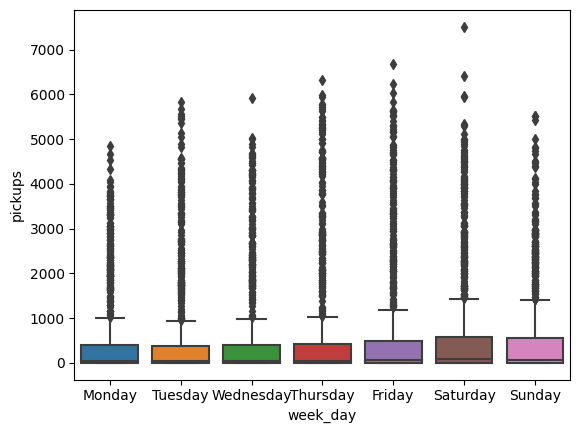

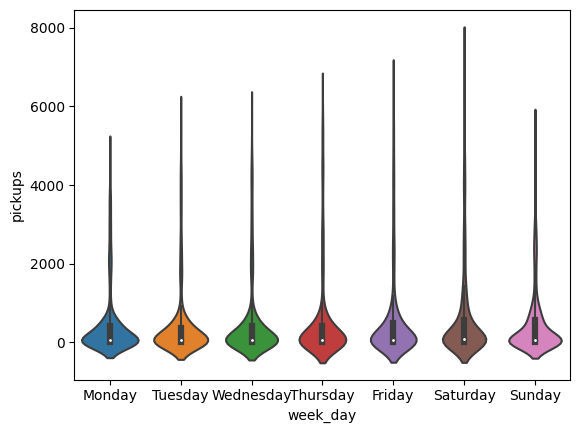

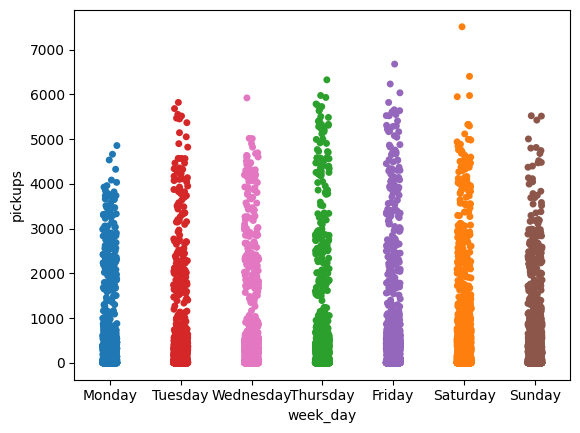

In [7]:
sns.boxplot(
    data=uber_pickups,
    x="week_day",
    y="pickups",
    order=weekday_order,
)
plt.show()

sns.violinplot(
    data=uber_pickups,
    x="week_day",
    y="pickups",
    order=weekday_order,
)
plt.show()

sns.stripplot(
    data=uber_pickups,
    x="week_day",
    y="pickups",
    hue="week_day",
    legend=False,
    order=weekday_order,
)
plt.show()

#### Prompt 8 - Create a chart showing how pickups are affected by some weather factor.  Include information about Borough in your chart.  Use the `plotly` package to create this chart

-------

In [8]:
uber = pd.merge(
    uber_pickups,
    uber_weather,
    how="left",
    left_on=["pickup_dt", "borough_id"],
    right_on=["datetime", "borough_id"],
)

uber = pd.merge(uber, uber_boroughs, how="left", left_on="borough_id", right_on="id")

# Throw an error if we had duplicates created or rows lost
assert uber.shape[0] == uber_pickups.shape[0]

uber.head(3)

,pickup_dt,borough_id,holiday,pickups,week_day,datetime,wind_speed_mph,visibility_miles,temp_f,dewpoint_f,sea_level_pressure,precip_1_hr_in,precip_6_hr_in,precip_24_hr_in,snow_depth_in,id,borough
0,2015-04-27 13:00:00,4,N,274,Monday,2015-04-27 13:00:00,3.0,10.0,51.0,31.0,1005.0,0.0,0.000,0.905,0.0,4,Queens
1,2015-03-28 04:00:00,3,N,1120,Saturday,2015-03-28 04:00:00,5.0,10.0,41.0,25.0,1008.8,0.0,0.000,0.000,0.0,3,Manhattan
2,2015-06-06 00:00:00,5,N,5,Saturday,2015-06-06 00:00:00,0.0,10.0,64.5,55.0,1014.0,0.0,0.055,0.080,0.0,5,Staten Island


In [9]:
fig = px.scatter(
    data_frame=uber,
    x="temp_f",
    y="pickups",
    color="borough",
)
fig.show()

#### Prompt 9 - Interpret your chart from Prompt 8

-------

In [10]:
# Please answer #9 here as a comment (it makes it stand out for us to grade easier)
#
# Pickups generally increase as temperature increases.
# The boroughs differ greatly in number of pickups; Manhattan
# has the largest number of pickups.
#
# Use legend of plotly chart to toggle visibility of a group.

#### Prompt 10 - Disconnect from the database

-------

In [11]:
engine.dispose()